<a href="https://colab.research.google.com/github/Veleces/Project/blob/main/Fraud_Detection_Model_Explanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

# Setup
First, we need to mount this notebook to our Google Drive folder, in order to access the CSV data file.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In order to view, analyse and manipulate the dataset, we must load it into something called a dataframe, which is a way of storing tabulated data in a virtual table. This dataframe will allow us to analyse the data freely. To load it into a dataframe, we will need a package called Pandas. We can install pandas with this command:

In [2]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


And now we can import this package like so:

In [3]:
import pandas as pd

# Data loading
Now that Google Drive is mounted, you can store the CSV file anywhere in your Drive and update the path variable below to access it within this notebook. Once we've updated the path, let's read this CSV file into a pandas dataframe and see what it looks like

In [4]:
path = "/content/drive/MyDrive/DATASET/dataset/"

smpl_sub = pd.read_csv(f"{path}sample_submission.csv")
smpl_sub.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
smpl_sub.head()

,V2,Probability,Target
0,TID198043,0.88,0
1,TID312736,0.42,0
2,TID308818,0.97,1
3,TID321252,0.48,0
4,TID420788,0.41,0


In [5]:
train = pd.read_csv(f"{path}train.csv")
train.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,Target,V13
0,CUID1872,TID229526,EID2062082,485.69445,2020-03-20 22:51:30,376474,A,BA1,BB425559,PD44707,CC1,CP0,0,2020-03-21 00:00:00
1,CUID5533,TID244499,EID1459012,393.45200,2020-04-28 07:17:12,33227,A,BA4793,BB248012,PD39453,CC1,CP0,0,2020-04-28 00:00:00
2,CUID5278,TID311877,EID0,375.75000,2020-08-15 04:11:43,0,F,BA5631,BB166256,PD237664,CC1,CP0,0,NaN
3,CUID24,TID279685,EID0,6.97225,2020-06-26 01:11:42,0,C,BA7188,BB354924,PD99032,CC1,CP0,0,NaN
4,CUID449,TID104689,EID0,16.70000,2020-09-15 10:11:06,0,C,BA7236,BB354924,PD63422,CC1,CP0,0,NaN


In [6]:
train_helper = pd.read_csv(f"{path}train_helper.csv")
train.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
train_helper.head()

,V1,V3,V14,V15,V16,V17,V18,V19,V20,V21
0,CUID1626,EID1390067,B170291,A,2017-11-18 05:26:58,117.167.140.162,875,1525792,77.55,NaN
1,CUID2932,EID397864,B170291,A,2017-11-18 05:26:59,133.193.46.52,875,471293,-25.85,NaN
2,CUID7230,EID315534,B1827073,B,2017-11-18 05:27:02,127.75.140.137,875,825535,NaN,373.50
3,CUID1588,EID1724187,B170291,A,2017-11-18 05:27:30,120.210.191.123,875,2136427,-23.50,NaN
4,CUID3625,EID637357,B2356022,B,2017-11-18 05:27:55,127.75.145.110,875,825535,169.20,400.06


In [7]:
test = pd.read_csv(f"{path}test.csv")
test.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,CUID6660,TID198043,EID908838,4154.125,13-08-2020 08:41,33227,A,BA4811,BB68389,PD39402,CC1,CP0,11-08-2020 00:00
1,CUID6660,TID312736,EID502971,8350.000,17-08-2020 04:13,33227,A,BA4811,BB68389,PD39402,CC1,CP0,11-08-2020 00:00
2,CUID6660,TID308818,EID231193,20.875,11-08-2020 01:40,363981,A,BA4811,BB68389,PD39402,CC1,CP0,11-08-2020 00:00
3,CUID6660,TID321252,EID1124129,20457.500,30-08-2020 22:11,33227,A,BA4811,BB68389,PD39402,CC1,CP0,11-08-2020 00:00
4,CUID6660,TID420788,EID908838,4154.125,13-08-2020 08:40,33227,A,BA4811,BB68389,PD39402,CC1,CP0,11-08-2020 00:00


In [8]:
test_helper = pd.read_csv(f"{path}test_helper.csv")
test.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
test_helper.head()

,V1,V3,V14,V15,V16,V17,V18,V19,V20,V21
0,CUID3258,EID1709316,B170291,A,2018-01-16 13:55:17,168.160.152.82,875,498795,94.00,NaN
1,CUID2835,EID339299,B170291,A,2018-01-16 13:55:18,121.122.132.145,875,33514,129.25,NaN
2,CUID1750,EID342176,B170291,A,2018-01-16 13:56:23,183.207.164.149,875,2136427,98.70,NaN
3,CUID103,EID1507511,B4995,A,2018-01-16 13:56:37,123.143.40.203,875,1730685,96.35,NaN
4,CUID1750,EID342176,B1827073,B,2018-01-16 13:56:46,183.207.164.149,875,2136427,NaN,63.91


# Descriptive statistics
From just looking at the data, it is hard to get a feeling of what all the columns and rows mean. To gain an understanding of the dataset, let's first look at what columns and datatypes we have

In [9]:
# Function to obtain unique values in our Data Frames

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  
  print(value_counts)

In [10]:
smpl_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215852 entries, 0 to 215851
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   V2           215852 non-null  object 
 1   Probability  215852 non-null  float64
 2   Target       215852 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.9+ MB


In [11]:
smpl_sub.describe()

,Probability,Target
count,215852.000000,215852.000000
mean,0.499239,0.049868
std,0.288794,0.217672
min,0.000000,0.000000
25%,0.250000,0.000000
50%,0.500000,0.000000
75%,0.750000,0.000000
max,1.000000,1.000000


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233633 entries, 0 to 233632
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      233633 non-null  object 
 1   V2      233633 non-null  object 
 2   V3      233633 non-null  object 
 3   V4      233633 non-null  float64
 4   V5      233633 non-null  object 
 5   V6      233633 non-null  int64  
 6   V7      233633 non-null  object 
 7   V8      233633 non-null  object 
 8   V9      233633 non-null  object 
 9   V10     233633 non-null  object 
 10  V11     233633 non-null  object 
 11  V12     233633 non-null  object 
 12  Target  233633 non-null  int64  
 13  V13     231762 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 25.0+ MB


In [13]:
train.describe()

,V4,V6,Target
count,233633.000000,233633.000000,233633.000000
mean,266.360390,103071.463312,0.005521
std,1338.657212,143360.598172,0.074101
min,0.008350,0.000000,0.000000
25%,12.525000,33227.000000,0.000000
50%,33.400000,33227.000000,0.000000
75%,115.230000,33227.000000,0.000000
max,41750.000000,447246.000000,1.000000


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215852 entries, 0 to 215851
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      215852 non-null  object 
 1   V2      215852 non-null  object 
 2   V3      215852 non-null  object 
 3   V4      215852 non-null  float64
 4   V5      215852 non-null  object 
 5   V6      215852 non-null  int64  
 6   V7      215852 non-null  object 
 7   V8      215852 non-null  object 
 8   V9      215852 non-null  object 
 9   V10     215852 non-null  object 
 10  V11     215852 non-null  object 
 11  V12     215852 non-null  object 
 12  V13     213091 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 21.4+ MB


In [15]:
test.describe()

,V4,V6
count,215852.000000,215852.000000
mean,262.328220,105498.133383
std,1239.528482,145523.323021
min,0.008350,0.000000
25%,13.360000,33227.000000
50%,40.080000,33227.000000
75%,125.250000,33227.000000
max,41749.165000,447243.000000


In [16]:
get_unique_values(train, 'V1'), get_unique_values(train, 'V2'), \
get_unique_values(train, 'V6'), get_unique_values(train, 'V7'), \
get_unique_values(train, 'V8'), get_unique_values(train, 'V9'), \
get_unique_values(train, 'V10'),get_unique_values(train, 'V11'), \
get_unique_values(train, 'V12')

Column: V1 has 3684 unique values

CUID914     3467
CUID4198    2561
CUID5626    1458
CUID4334    1310
CUID3661    1275
            ... 
CUID4719       1
CUID3531       1
CUID6397       1
CUID4983       1
CUID6341       1
Name: V1, Length: 3684, dtype: int64
Column: V2 has 233633 unique values

TID229526    1
TID180526    1
TID385926    1
TID268530    1
TID98341     1
            ..
TID376696    1
TID161843    1
TID34969     1
TID96854     1
TID158744    1
Name: V2, Length: 233633, dtype: int64
Column: V6 has 307 unique values

33227     166955
391083     26111
3139       16237
363981      5978
380044      5958
           ...  
2004           1
1796           1
1254           1
1850           1
1295           1
Name: V6, Length: 307, dtype: int64
Column: V7 has 6 unique values

A    228596
B      3043
C       894
E       574
D       348
F       178
Name: V7, dtype: int64
Column: V8 has 35508 unique values

BA58575     7100
BA73406     2870
BA1         1987
BA206639    1718
BA12142     

(None, None, None, None, None, None, None, None, None)

# Visualization

In [17]:
# Count the number of occurrences of 1 in the 'Target' column
num_ones = train['Target'].value_counts(normalize=False)[0]

num_zeros = train['Target'].value_counts(normalize=False)[1]

# Print the result
print(f"""There are {num_ones} genuine transactions and {num_zeros} fraudulent
transactions, being {train['Target'].count()} rows in total.""")

There are 232343 genuine transactions and 1290 fraudulent
transactions, being 233633 rows in total.


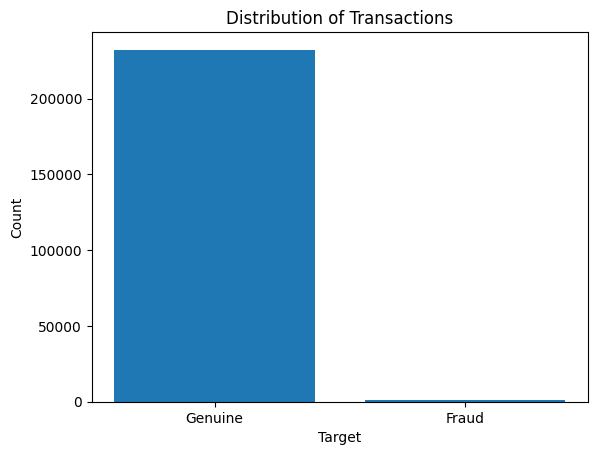

In [18]:
import matplotlib.pyplot as plt

# Count the number of occurrences of 1 and 0 in the 'Target' column
num_ones = train['Target'].value_counts(normalize=False)[0]
num_zeros = train['Target'].value_counts(normalize=False)[1]

# Create a bar plot
plt.bar(['Genuine', 'Fraud'], [num_ones, num_zeros])

# Add labels and title
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Transactions')
plt.show()

# Data cleaning
Now that we have our 3 datasets successfully loaded, we need to ensure that the data is clean. Data cleaning can be a very intense task, we will focus just on ensuring that the correct datatypes are present for each column, and if not, correcting them.

Everything looks fine for the 3 datasets apart from the timestamp column in the last two dataset. Let's convert this to the correct type for each dataset. We need to correct, V5 and V13 as correct Date Format

In [19]:
# Create two functions for date correction

def convert_to_datetime(data: pd.DataFrame = None, column: str = None):

  dummy = data.copy()
  dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
  return dummy

def convert_to_datetime2(data: pd.DataFrame = None, column: str = None):

  dummy = data.copy()
  dummy[column] = pd.to_datetime(dummy[column], format='%d-%m-%Y %H:%M')
  dummy[column] = dummy[column].dt.strftime('%Y-%m-%d %H:%M:%S')
  dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
  return dummy

In [20]:
# Convert a column from string to datetime format

train = convert_to_datetime(train, "V5")
train = convert_to_datetime(train, "V13")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233633 entries, 0 to 233632
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   V1      233633 non-null  object        
 1   V2      233633 non-null  object        
 2   V3      233633 non-null  object        
 3   V4      233633 non-null  float64       
 4   V5      233633 non-null  datetime64[ns]
 5   V6      233633 non-null  int64         
 6   V7      233633 non-null  object        
 7   V8      233633 non-null  object        
 8   V9      233633 non-null  object        
 9   V10     233633 non-null  object        
 10  V11     233633 non-null  object        
 11  V12     233633 non-null  object        
 12  Target  233633 non-null  int64         
 13  V13     231762 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(9)
memory usage: 25.0+ MB


In [21]:
# Convert a column from string to datetime format
test = convert_to_datetime2(test, 'V5')
test = convert_to_datetime2(test, 'V13')

# Display the first few rows of the modified DataFrame
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215852 entries, 0 to 215851
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   V1      215852 non-null  object        
 1   V2      215852 non-null  object        
 2   V3      215852 non-null  object        
 3   V4      215852 non-null  float64       
 4   V5      215852 non-null  datetime64[ns]
 5   V6      215852 non-null  int64         
 6   V7      215852 non-null  object        
 7   V8      215852 non-null  object        
 8   V9      215852 non-null  object        
 9   V10     215852 non-null  object        
 10  V11     215852 non-null  object        
 11  V12     215852 non-null  object        
 12  V13     213091 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(9)
memory usage: 21.4+ MB


In [22]:
train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,Target,V13
0,CUID1872,TID229526,EID2062082,485.69445,2020-03-20 22:51:30,376474,A,BA1,BB425559,PD44707,CC1,CP0,0,2020-03-21
1,CUID5533,TID244499,EID1459012,393.45200,2020-04-28 07:17:12,33227,A,BA4793,BB248012,PD39453,CC1,CP0,0,2020-04-28
2,CUID5278,TID311877,EID0,375.75000,2020-08-15 04:11:43,0,F,BA5631,BB166256,PD237664,CC1,CP0,0,NaT
3,CUID24,TID279685,EID0,6.97225,2020-06-26 01:11:42,0,C,BA7188,BB354924,PD99032,CC1,CP0,0,NaT
4,CUID449,TID104689,EID0,16.70000,2020-09-15 10:11:06,0,C,BA7236,BB354924,PD63422,CC1,CP0,0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233628,CUID449,TID325283,EID430976,41.75000,2020-09-06 03:42:03,391083,A,BA431477,BB282621,PD206909,CC1,CP443835,0,2019-02-03
233629,CUID449,TID314228,EID2012983,83.50000,2020-08-19 04:43:01,391083,A,BA431477,BB282621,PD206909,CC1,CP443835,0,2019-02-03
233630,CUID449,TID318682,EID1776806,41.75000,2020-08-26 05:51:17,391083,A,BA431477,BB282621,PD206909,CC1,CP443835,0,2019-02-03
233631,CUID449,TID9480,EID631635,167.00000,2020-04-15 20:35:21,53,E,BA447678,BB447445,PD0,CC1,CP443835,0,2020-04-16


In [23]:
test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,CUID6660,TID198043,EID908838,4154.12500,2020-08-13 08:41:00,33227,A,BA4811,BB68389,PD39402,CC1,CP0,2020-08-11
1,CUID6660,TID312736,EID502971,8350.00000,2020-08-17 04:13:00,33227,A,BA4811,BB68389,PD39402,CC1,CP0,2020-08-11
2,CUID6660,TID308818,EID231193,20.87500,2020-08-11 01:40:00,363981,A,BA4811,BB68389,PD39402,CC1,CP0,2020-08-11
3,CUID6660,TID321252,EID1124129,20457.50000,2020-08-30 22:11:00,33227,A,BA4811,BB68389,PD39402,CC1,CP0,2020-08-11
4,CUID6660,TID420788,EID908838,4154.12500,2020-08-13 08:40:00,33227,A,BA4811,BB68389,PD39402,CC1,CP0,2020-08-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215847,CUID1447,TID282851,EID2057828,125.24165,2020-07-01 05:20:00,380044,A,BA11135,BB68920,PD57769,CC1,CP443935,2020-05-23
215848,CUID1447,TID250595,EID1438371,41.74165,2020-05-09 11:18:00,380044,A,BA11135,BB68920,PD14453,CC1,CP443935,2020-04-30
215849,CUID1447,TID401706,EID1645339,83.50000,2020-07-13 20:45:00,380044,A,BA376237,BB189059,PD13526,CC1,CP443935,2020-07-14
215850,CUID1447,TID312292,EID2054990,80.16000,2020-08-15 11:11:00,380044,A,BA377591,BB171054,PD35695,CC1,CP443935,2019-09-02


In [24]:
# Order by Date
train = train.sort_values(by='V5')

In [25]:
# # Order by Date #### Problema para reordenar los resultados finales
# train = train.sort_values(by='V5').reset_index(drop=True)
# test = test.sort_values(by='V5').reset_index(drop=True)

In [26]:
train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,Target,V13
210741,CUID3119,TID341086,EID707974,50.100,2020-03-16 13:59:16,33227,A,BA155766,BB232521,PD54346,CC1,CP340905,0,2020-01-22
210780,CUID3119,TID228222,EID707974,30.895,2020-03-16 14:01:45,33227,A,BA328639,BB206897,PD54346,CC1,CP340905,0,2020-03-17
210750,CUID3119,TID228223,EID707974,97.695,2020-03-16 14:05:25,33227,A,BA174719,BB205955,PD74488,CC1,CP340905,0,2020-01-04
208098,CUID2530,TID228224,EID1128478,835.000,2020-03-16 14:16:07,391083,A,BA161858,BB314328,PD349663,CC1,CP334141,0,2017-06-19
5526,CUID3740,TID114328,EID528977,54.275,2020-03-16 14:23:04,33227,A,BA121671,BB207519,PD102148,CC1,CP137204,0,2020-03-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218670,CUID6109,TID331741,EID1019940,8.350,2020-09-15 13:42:18,33227,A,BA250378,BB218787,PD297293,CC1,CP382699,0,2019-10-15
105229,CUID4851,TID441061,EID1652659,25.050,2020-09-15 13:46:25,33227,A,BA97876,BB150496,PD94929,CC1,CP300944,0,2020-09-15
95486,CUID5514,TID331742,EID624935,31.730,2020-09-15 13:47:55,391083,A,BA403151,BB302547,PD104422,CC1,CP263875,0,2016-02-04
79902,CUID2262,TID104209,EID2048671,58.450,2020-09-15 13:52:27,33227,A,BA151476,BB68418,PD137069,CC1,CP202700,0,2020-04-13


In [27]:
test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,CUID6660,TID198043,EID908838,4154.12500,2020-08-13 08:41:00,33227,A,BA4811,BB68389,PD39402,CC1,CP0,2020-08-11
1,CUID6660,TID312736,EID502971,8350.00000,2020-08-17 04:13:00,33227,A,BA4811,BB68389,PD39402,CC1,CP0,2020-08-11
2,CUID6660,TID308818,EID231193,20.87500,2020-08-11 01:40:00,363981,A,BA4811,BB68389,PD39402,CC1,CP0,2020-08-11
3,CUID6660,TID321252,EID1124129,20457.50000,2020-08-30 22:11:00,33227,A,BA4811,BB68389,PD39402,CC1,CP0,2020-08-11
4,CUID6660,TID420788,EID908838,4154.12500,2020-08-13 08:40:00,33227,A,BA4811,BB68389,PD39402,CC1,CP0,2020-08-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215847,CUID1447,TID282851,EID2057828,125.24165,2020-07-01 05:20:00,380044,A,BA11135,BB68920,PD57769,CC1,CP443935,2020-05-23
215848,CUID1447,TID250595,EID1438371,41.74165,2020-05-09 11:18:00,380044,A,BA11135,BB68920,PD14453,CC1,CP443935,2020-04-30
215849,CUID1447,TID401706,EID1645339,83.50000,2020-07-13 20:45:00,380044,A,BA376237,BB189059,PD13526,CC1,CP443935,2020-07-14
215850,CUID1447,TID312292,EID2054990,80.16000,2020-08-15 11:11:00,380044,A,BA377591,BB171054,PD35695,CC1,CP443935,2019-09-02


In [28]:
# Modify the name and data type of columns 

train = train.rename(columns={'V1':'CUID', 'V2':'TID', 'V3':'EID', 'V4':'AMOUNT', 
                              'V5':'TIMESTAMP', 'V7':'LETTER', 'V8':'BA','V9':'BB', 
                              'V10':'PD', 'V11':'CC', 'V12':'CP', 'V13':'TIMESTAMP2'})

# Remove string from numbers and convert to integer format

train['CUID'] = train['CUID'].str.replace('^CUID', '', regex=True).astype('int64')
train['TID'] = train['TID'].str.replace('^TID', '', regex=True).astype('int64')
train['EID'] = train['EID'].str.replace('^EID', '', regex=True).astype('int64')
train['LETTER'].replace({'A': 10, 'B': 9, 'C': 8, 'D': 7, 'E': 6, 'F': 5}, inplace=True)
train['BA'] = train['BA'].str.replace('^BA', '', regex=True).astype('int64')
train['BB'] = train['BB'].str.replace('^BB', '', regex=True).astype('int64')
train['PD'] = train['PD'].str.replace('^PD', '', regex=True).astype('int64')
train['CC'] = train['CC'].str.replace('^CC', '', regex=True).astype('int64')
train['CP'] = train['CP'].str.replace('^CP', '', regex=True).astype('int64')

train

,CUID,TID,EID,AMOUNT,TIMESTAMP,V6,LETTER,BA,BB,PD,CC,CP,Target,TIMESTAMP2
210741,3119,341086,707974,50.100,2020-03-16 13:59:16,33227,10,155766,232521,54346,1,340905,0,2020-01-22
210780,3119,228222,707974,30.895,2020-03-16 14:01:45,33227,10,328639,206897,54346,1,340905,0,2020-03-17
210750,3119,228223,707974,97.695,2020-03-16 14:05:25,33227,10,174719,205955,74488,1,340905,0,2020-01-04
208098,2530,228224,1128478,835.000,2020-03-16 14:16:07,391083,10,161858,314328,349663,1,334141,0,2017-06-19
5526,3740,114328,528977,54.275,2020-03-16 14:23:04,33227,10,121671,207519,102148,1,137204,0,2020-03-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218670,6109,331741,1019940,8.350,2020-09-15 13:42:18,33227,10,250378,218787,297293,1,382699,0,2019-10-15
105229,4851,441061,1652659,25.050,2020-09-15 13:46:25,33227,10,97876,150496,94929,1,300944,0,2020-09-15
95486,5514,331742,624935,31.730,2020-09-15 13:47:55,391083,10,403151,302547,104422,1,263875,0,2016-02-04
79902,2262,104209,2048671,58.450,2020-09-15 13:52:27,33227,10,151476,68418,137069,1,202700,0,2020-04-13


In [29]:
# Split TIMESTAMP and TIMESTAMP2 into multiple variables

#TIMESTAMP

train['Year'] = train['TIMESTAMP'].dt.year
train['Month'] = train['TIMESTAMP'].dt.month
train['Day'] = train['TIMESTAMP'].dt.day
train['Hour'] = train['TIMESTAMP'].dt.hour
train['Minute'] = train['TIMESTAMP'].dt.minute
train['Second'] = train['TIMESTAMP'].dt.second

#TIMESTAMP2

train['Year2'] = train['TIMESTAMP2'].dt.year
train['Month2'] = train['TIMESTAMP2'].dt.month
train['Day2'] = train['TIMESTAMP2'].dt.day


train

,CUID,TID,EID,AMOUNT,TIMESTAMP,V6,LETTER,BA,BB,PD,...,TIMESTAMP2,Year,Month,Day,Hour,Minute,Second,Year2,Month2,Day2
210741,3119,341086,707974,50.100,2020-03-16 13:59:16,33227,10,155766,232521,54346,...,2020-01-22,2020,3,16,13,59,16,2020.0,1.0,22.0
210780,3119,228222,707974,30.895,2020-03-16 14:01:45,33227,10,328639,206897,54346,...,2020-03-17,2020,3,16,14,1,45,2020.0,3.0,17.0
210750,3119,228223,707974,97.695,2020-03-16 14:05:25,33227,10,174719,205955,74488,...,2020-01-04,2020,3,16,14,5,25,2020.0,1.0,4.0
208098,2530,228224,1128478,835.000,2020-03-16 14:16:07,391083,10,161858,314328,349663,...,2017-06-19,2020,3,16,14,16,7,2017.0,6.0,19.0
5526,3740,114328,528977,54.275,2020-03-16 14:23:04,33227,10,121671,207519,102148,...,2020-03-17,2020,3,16,14,23,4,2020.0,3.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218670,6109,331741,1019940,8.350,2020-09-15 13:42:18,33227,10,250378,218787,297293,...,2019-10-15,2020,9,15,13,42,18,2019.0,10.0,15.0
105229,4851,441061,1652659,25.050,2020-09-15 13:46:25,33227,10,97876,150496,94929,...,2020-09-15,2020,9,15,13,46,25,2020.0,9.0,15.0
95486,5514,331742,624935,31.730,2020-09-15 13:47:55,391083,10,403151,302547,104422,...,2016-02-04,2020,9,15,13,47,55,2016.0,2.0,4.0
79902,2262,104209,2048671,58.450,2020-09-15 13:52:27,33227,10,151476,68418,137069,...,2020-04-13,2020,9,15,13,52,27,2020.0,4.0,13.0


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233633 entries, 210741 to 79913
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   CUID        233633 non-null  int64         
 1   TID         233633 non-null  int64         
 2   EID         233633 non-null  int64         
 3   AMOUNT      233633 non-null  float64       
 4   TIMESTAMP   233633 non-null  datetime64[ns]
 5   V6          233633 non-null  int64         
 6   LETTER      233633 non-null  int64         
 7   BA          233633 non-null  int64         
 8   BB          233633 non-null  int64         
 9   PD          233633 non-null  int64         
 10  CC          233633 non-null  int64         
 11  CP          233633 non-null  int64         
 12  Target      233633 non-null  int64         
 13  TIMESTAMP2  231762 non-null  datetime64[ns]
 14  Year        233633 non-null  int64         
 15  Month       233633 non-null  int64         
 16

In [31]:
# Modify the name and data type of columns for test

test = test.rename(columns={'V1':'CUID', 'V2':'TID', 'V3':'EID', 'V4':'AMOUNT', 
                            'V5':'TIMESTAMP', 'V7':'LETTER', 'V8':'BA', 'V9':'BB', 
                            'V10':'PD', 'V11':'CC', 'V12':'CP', 'V13':'TIMESTAMP2'})

# Remove string from numbers and convert to integer format

test['CUID'] = test['CUID'].str.replace('^CUID', '', regex=True).astype('int64')
test['TID'] = test['TID'].str.replace('^TID', '', regex=True).astype('int64')
test['EID'] = test['EID'].str.replace('^EID', '', regex=True).astype('int64')
test['LETTER'].replace({'A': 10, 'B': 9, 'C': 8, 'D': 7, 'E': 6, 'F': 5}, inplace=True)
test['BA'] = test['BA'].str.replace('^BA', '', regex=True).astype('int64')
test['BB'] = test['BB'].str.replace('^BB', '', regex=True).astype('int64')
test['PD'] = test['PD'].str.replace('^PD', '', regex=True).astype('int64')
test['CC'] = test['CC'].str.replace('^CC', '', regex=True).astype('int64')
test['CP'] = test['CP'].str.replace('^CP', '', regex=True).astype('int64')

test

,CUID,TID,EID,AMOUNT,TIMESTAMP,V6,LETTER,BA,BB,PD,CC,CP,TIMESTAMP2
0,6660,198043,908838,4154.12500,2020-08-13 08:41:00,33227,10,4811,68389,39402,1,0,2020-08-11
1,6660,312736,502971,8350.00000,2020-08-17 04:13:00,33227,10,4811,68389,39402,1,0,2020-08-11
2,6660,308818,231193,20.87500,2020-08-11 01:40:00,363981,10,4811,68389,39402,1,0,2020-08-11
3,6660,321252,1124129,20457.50000,2020-08-30 22:11:00,33227,10,4811,68389,39402,1,0,2020-08-11
4,6660,420788,908838,4154.12500,2020-08-13 08:40:00,33227,10,4811,68389,39402,1,0,2020-08-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215847,1447,282851,2057828,125.24165,2020-07-01 05:20:00,380044,10,11135,68920,57769,1,443935,2020-05-23
215848,1447,250595,1438371,41.74165,2020-05-09 11:18:00,380044,10,11135,68920,14453,1,443935,2020-04-30
215849,1447,401706,1645339,83.50000,2020-07-13 20:45:00,380044,10,376237,189059,13526,1,443935,2020-07-14
215850,1447,312292,2054990,80.16000,2020-08-15 11:11:00,380044,10,377591,171054,35695,1,443935,2019-09-02


In [32]:
# Split TIMESTAMP and TIMESTAMP2 into multiple variables

test['Year'] = test['TIMESTAMP'].dt.year
test['Month'] = test['TIMESTAMP'].dt.month
test['Day'] = test['TIMESTAMP'].dt.day
test['Hour'] = test['TIMESTAMP'].dt.hour
test['Minute'] = test['TIMESTAMP'].dt.minute
test['Second'] = test['TIMESTAMP'].dt.second

#TIMESTAMP2

test['Year2'] = test['TIMESTAMP2'].dt.year
test['Month2'] = test['TIMESTAMP2'].dt.month
test['Day2'] = test['TIMESTAMP2'].dt.day

test

,CUID,TID,EID,AMOUNT,TIMESTAMP,V6,LETTER,BA,BB,PD,...,TIMESTAMP2,Year,Month,Day,Hour,Minute,Second,Year2,Month2,Day2
0,6660,198043,908838,4154.12500,2020-08-13 08:41:00,33227,10,4811,68389,39402,...,2020-08-11,2020,8,13,8,41,0,2020.0,8.0,11.0
1,6660,312736,502971,8350.00000,2020-08-17 04:13:00,33227,10,4811,68389,39402,...,2020-08-11,2020,8,17,4,13,0,2020.0,8.0,11.0
2,6660,308818,231193,20.87500,2020-08-11 01:40:00,363981,10,4811,68389,39402,...,2020-08-11,2020,8,11,1,40,0,2020.0,8.0,11.0
3,6660,321252,1124129,20457.50000,2020-08-30 22:11:00,33227,10,4811,68389,39402,...,2020-08-11,2020,8,30,22,11,0,2020.0,8.0,11.0
4,6660,420788,908838,4154.12500,2020-08-13 08:40:00,33227,10,4811,68389,39402,...,2020-08-11,2020,8,13,8,40,0,2020.0,8.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215847,1447,282851,2057828,125.24165,2020-07-01 05:20:00,380044,10,11135,68920,57769,...,2020-05-23,2020,7,1,5,20,0,2020.0,5.0,23.0
215848,1447,250595,1438371,41.74165,2020-05-09 11:18:00,380044,10,11135,68920,14453,...,2020-04-30,2020,5,9,11,18,0,2020.0,4.0,30.0
215849,1447,401706,1645339,83.50000,2020-07-13 20:45:00,380044,10,376237,189059,13526,...,2020-07-14,2020,7,13,20,45,0,2020.0,7.0,14.0
215850,1447,312292,2054990,80.16000,2020-08-15 11:11:00,380044,10,377591,171054,35695,...,2019-09-02,2020,8,15,11,11,0,2019.0,9.0,2.0


In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215852 entries, 0 to 215851
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   CUID        215852 non-null  int64         
 1   TID         215852 non-null  int64         
 2   EID         215852 non-null  int64         
 3   AMOUNT      215852 non-null  float64       
 4   TIMESTAMP   215852 non-null  datetime64[ns]
 5   V6          215852 non-null  int64         
 6   LETTER      215852 non-null  int64         
 7   BA          215852 non-null  int64         
 8   BB          215852 non-null  int64         
 9   PD          215852 non-null  int64         
 10  CC          215852 non-null  int64         
 11  CP          215852 non-null  int64         
 12  TIMESTAMP2  213091 non-null  datetime64[ns]
 13  Year        215852 non-null  int64         
 14  Month       215852 non-null  int64         
 15  Day         215852 non-null  int64         
 16  Ho

In [34]:
# Remove columns that will not be used for our Model

train = train.drop('TIMESTAMP', axis=1)
#train = train.drop('V7', axis=1)
#train = train.drop('V11', axis=1)
train = train.drop('TIMESTAMP2', axis=1)
#train = train.drop('AMOUNT', axis=1)
#train = train.drop('TID', axis=1)
#train = train.drop('EID', axis=1)
#train = train.drop('V6', axis=1)


train

,CUID,TID,EID,AMOUNT,V6,LETTER,BA,BB,PD,CC,...,Target,Year,Month,Day,Hour,Minute,Second,Year2,Month2,Day2
210741,3119,341086,707974,50.100,33227,10,155766,232521,54346,1,...,0,2020,3,16,13,59,16,2020.0,1.0,22.0
210780,3119,228222,707974,30.895,33227,10,328639,206897,54346,1,...,0,2020,3,16,14,1,45,2020.0,3.0,17.0
210750,3119,228223,707974,97.695,33227,10,174719,205955,74488,1,...,0,2020,3,16,14,5,25,2020.0,1.0,4.0
208098,2530,228224,1128478,835.000,391083,10,161858,314328,349663,1,...,0,2020,3,16,14,16,7,2017.0,6.0,19.0
5526,3740,114328,528977,54.275,33227,10,121671,207519,102148,1,...,0,2020,3,16,14,23,4,2020.0,3.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218670,6109,331741,1019940,8.350,33227,10,250378,218787,297293,1,...,0,2020,9,15,13,42,18,2019.0,10.0,15.0
105229,4851,441061,1652659,25.050,33227,10,97876,150496,94929,1,...,0,2020,9,15,13,46,25,2020.0,9.0,15.0
95486,5514,331742,624935,31.730,391083,10,403151,302547,104422,1,...,0,2020,9,15,13,47,55,2016.0,2.0,4.0
79902,2262,104209,2048671,58.450,33227,10,151476,68418,137069,1,...,0,2020,9,15,13,52,27,2020.0,4.0,13.0


In [35]:
# Remove columns that will not be used for our Model

test = test.drop('TIMESTAMP', axis=1)
#test = test.drop('V7', axis=1)
#test = test.drop('V11', axis=1)
test = test.drop('TIMESTAMP2', axis=1)
#test = test.drop('AMOUNT', axis=1)
#test = test.drop('TID', axis=1)
#test = test.drop('EID', axis=1)
#test = test.drop('V6', axis=1)

test

,CUID,TID,EID,AMOUNT,V6,LETTER,BA,BB,PD,CC,CP,Year,Month,Day,Hour,Minute,Second,Year2,Month2,Day2
0,6660,198043,908838,4154.12500,33227,10,4811,68389,39402,1,0,2020,8,13,8,41,0,2020.0,8.0,11.0
1,6660,312736,502971,8350.00000,33227,10,4811,68389,39402,1,0,2020,8,17,4,13,0,2020.0,8.0,11.0
2,6660,308818,231193,20.87500,363981,10,4811,68389,39402,1,0,2020,8,11,1,40,0,2020.0,8.0,11.0
3,6660,321252,1124129,20457.50000,33227,10,4811,68389,39402,1,0,2020,8,30,22,11,0,2020.0,8.0,11.0
4,6660,420788,908838,4154.12500,33227,10,4811,68389,39402,1,0,2020,8,13,8,40,0,2020.0,8.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215847,1447,282851,2057828,125.24165,380044,10,11135,68920,57769,1,443935,2020,7,1,5,20,0,2020.0,5.0,23.0
215848,1447,250595,1438371,41.74165,380044,10,11135,68920,14453,1,443935,2020,5,9,11,18,0,2020.0,4.0,30.0
215849,1447,401706,1645339,83.50000,380044,10,376237,189059,13526,1,443935,2020,7,13,20,45,0,2020.0,7.0,14.0
215850,1447,312292,2054990,80.16000,380044,10,377591,171054,35695,1,443935,2020,8,15,11,11,0,2019.0,9.0,2.0


In [36]:
train.fillna(0, inplace = True)
train.isna().sum()

CUID      0
TID       0
EID       0
AMOUNT    0
V6        0
LETTER    0
BA        0
BB        0
PD        0
CC        0
CP        0
Target    0
Year      0
Month     0
Day       0
Hour      0
Minute    0
Second    0
Year2     0
Month2    0
Day2      0
dtype: int64

In [37]:
test.fillna(0, inplace = True)
test.isna().sum()

CUID      0
TID       0
EID       0
AMOUNT    0
V6        0
LETTER    0
BA        0
BB        0
PD        0
CC        0
CP        0
Year      0
Month     0
Day       0
Hour      0
Minute    0
Second    0
Year2     0
Month2    0
Day2      0
dtype: int64

In [38]:
train['Year2'] = train['Year2'].astype('int64')
train['Month2'] = train['Month2'].astype('int64')
train['Day2'] = train['Day2'].astype('int64')

test['Year2'] = test['Year2'].astype('int64')
test['Month2'] = test['Month2'].astype('int64')
test['Day2'] = test['Day2'].astype('int64')

In [39]:
# Utilizar pop() para sacar la columna 'Target' del dataframe
target = train.pop('Target')
# # Agregar la columna 'Target' al final del dataframe
# train.insert(3, 'Target', target)

# # Verificar el nuevo orden del dataframe
# print(df.head())

In [40]:
train

,CUID,TID,EID,AMOUNT,V6,LETTER,BA,BB,PD,CC,CP,Year,Month,Day,Hour,Minute,Second,Year2,Month2,Day2
210741,3119,341086,707974,50.100,33227,10,155766,232521,54346,1,340905,2020,3,16,13,59,16,2020,1,22
210780,3119,228222,707974,30.895,33227,10,328639,206897,54346,1,340905,2020,3,16,14,1,45,2020,3,17
210750,3119,228223,707974,97.695,33227,10,174719,205955,74488,1,340905,2020,3,16,14,5,25,2020,1,4
208098,2530,228224,1128478,835.000,391083,10,161858,314328,349663,1,334141,2020,3,16,14,16,7,2017,6,19
5526,3740,114328,528977,54.275,33227,10,121671,207519,102148,1,137204,2020,3,16,14,23,4,2020,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218670,6109,331741,1019940,8.350,33227,10,250378,218787,297293,1,382699,2020,9,15,13,42,18,2019,10,15
105229,4851,441061,1652659,25.050,33227,10,97876,150496,94929,1,300944,2020,9,15,13,46,25,2020,9,15
95486,5514,331742,624935,31.730,391083,10,403151,302547,104422,1,263875,2020,9,15,13,47,55,2016,2,4
79902,2262,104209,2048671,58.450,33227,10,151476,68418,137069,1,202700,2020,9,15,13,52,27,2020,4,13


In [41]:
train = pd.concat([train, target], axis = 1)

In [42]:
train

,CUID,TID,EID,AMOUNT,V6,LETTER,BA,BB,PD,CC,...,Year,Month,Day,Hour,Minute,Second,Year2,Month2,Day2,Target
210741,3119,341086,707974,50.100,33227,10,155766,232521,54346,1,...,2020,3,16,13,59,16,2020,1,22,0
210780,3119,228222,707974,30.895,33227,10,328639,206897,54346,1,...,2020,3,16,14,1,45,2020,3,17,0
210750,3119,228223,707974,97.695,33227,10,174719,205955,74488,1,...,2020,3,16,14,5,25,2020,1,4,0
208098,2530,228224,1128478,835.000,391083,10,161858,314328,349663,1,...,2020,3,16,14,16,7,2017,6,19,0
5526,3740,114328,528977,54.275,33227,10,121671,207519,102148,1,...,2020,3,16,14,23,4,2020,3,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218670,6109,331741,1019940,8.350,33227,10,250378,218787,297293,1,...,2020,9,15,13,42,18,2019,10,15,0
105229,4851,441061,1652659,25.050,33227,10,97876,150496,94929,1,...,2020,9,15,13,46,25,2020,9,15,0
95486,5514,331742,624935,31.730,391083,10,403151,302547,104422,1,...,2020,9,15,13,47,55,2016,2,4,0
79902,2262,104209,2048671,58.450,33227,10,151476,68418,137069,1,...,2020,9,15,13,52,27,2020,4,13,0


In [43]:
test

,CUID,TID,EID,AMOUNT,V6,LETTER,BA,BB,PD,CC,CP,Year,Month,Day,Hour,Minute,Second,Year2,Month2,Day2
0,6660,198043,908838,4154.12500,33227,10,4811,68389,39402,1,0,2020,8,13,8,41,0,2020,8,11
1,6660,312736,502971,8350.00000,33227,10,4811,68389,39402,1,0,2020,8,17,4,13,0,2020,8,11
2,6660,308818,231193,20.87500,363981,10,4811,68389,39402,1,0,2020,8,11,1,40,0,2020,8,11
3,6660,321252,1124129,20457.50000,33227,10,4811,68389,39402,1,0,2020,8,30,22,11,0,2020,8,11
4,6660,420788,908838,4154.12500,33227,10,4811,68389,39402,1,0,2020,8,13,8,40,0,2020,8,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215847,1447,282851,2057828,125.24165,380044,10,11135,68920,57769,1,443935,2020,7,1,5,20,0,2020,5,23
215848,1447,250595,1438371,41.74165,380044,10,11135,68920,14453,1,443935,2020,5,9,11,18,0,2020,4,30
215849,1447,401706,1645339,83.50000,380044,10,376237,189059,13526,1,443935,2020,7,13,20,45,0,2020,7,14
215850,1447,312292,2054990,80.16000,380044,10,377591,171054,35695,1,443935,2020,8,15,11,11,0,2019,9,2


In [44]:
# train.to_csv('Train.csv', index=False)
# test.to_csv('Test.csv', index=False)

# Machine Learning Model

In [45]:
# Model libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [46]:
# # Load the train and test data frames
# train = train
# test = test

In [47]:
# # Split the train data frame into a training set and a validation set
# X_train, X_val, y_train, y_val = train_test_split(train.drop('Target', axis=1), 
#                                                   train['Target'], 
#                                                   test_size=0.002, 
#                                                   random_state=42)

In [48]:
# Load the train and test data frames
X = train.drop('Target', axis=1)
y = train['Target']

In [49]:
# Split the train data frame into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.002, random_state=42)

In [50]:
# # Scale the data using StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)
# test_scaled = scaler.transform(test)

In [51]:
# Define several different models to include in the ensemble
model1 = LogisticRegression(random_state=42, max_iter=1000)
model2 = DecisionTreeClassifier(random_state=42)
model3 = KNeighborsClassifier()
model4 = RandomForestClassifier(random_state=42)

In [52]:
# # Train each of the models on the scaled training set
# model1.fit(X_train_scaled, y_train)
# model2.fit(X_train_scaled, y_train)
# model3.fit(X_train_scaled, y_train)
# model4.fit(X_train_scaled, y_train)

In [53]:
# Train each of the models on the scaled training set, No Scaling
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [54]:
# Use the trained models to make predictions on the scaled validation set
preds1 = model1.predict(X_val)
preds2 = model2.predict(X_val)
preds3 = model3.predict(X_val)
preds4 = model4.predict(X_val)

In [55]:
# Combine the predictions using a voting scheme to generate an ensemble prediction
ensemble_preds = (preds1 + preds2 + preds3 + preds4) / 4

In [56]:
# Evaluate the performance of the ensemble on the scaled validation set
ensemble_acc = (ensemble_preds == y_val).mean()
print('Ensemble accuracy on validation set:', ensemble_acc)

Ensemble accuracy on validation set: 0.9935897435897436


In [57]:
# Train the ensemble on the entire scaled train data frame
ensemble = VotingClassifier(estimators=[('lr', model1), 
                                        ('dt', model2), 
                                        ('knn', model3), 
                                        ('rf', model4)], 
                                        voting='soft')

#X = scaler.transform(X)
ensemble.fit(X, y)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier(random_state=42))],
                 voting='soft')

In [58]:
# Get the feature importances from the Random Forest classifier
feature_importances = model4.feature_importances_

# Create a list of tuples with feature names and importances
features = list(zip(X.columns, feature_importances))

# Sort the list by importance (in descending order)
features.sort(key=lambda x: x[1], reverse=True)

# Print the feature names and importances
for f in features:
    print(f[0], ':', f[1])


BB : 0.10858864569109296
CUID : 0.10652362862072638
CP : 0.10409399446614322
BA : 0.10096066409275875
PD : 0.08689518218918774
AMOUNT : 0.06416724025273111
Day2 : 0.0641657688602651
EID : 0.052428866347757716
Day : 0.04272703588854553
Month2 : 0.04152299822110857
TID : 0.04096754395617783
V6 : 0.033781639474584
Month : 0.03224806610637898
Hour : 0.030603629839534612
Minute : 0.030450430101776088
Second : 0.027662418618925683
Year2 : 0.023786048624163173
LETTER : 0.00842619864814265
CC : 0.0
Year : 0.0


In [59]:
# # Use the trained ensemble to make predictions on the scaled test data frame
# test_preds = pd.DataFrame(ensemble.predict_proba(test_scaled)[:,1], 
#                           columns=['Probability']).assign(Prediction=ensemble.predict(test_scaled))

In [60]:
# Use the trained ensemble to make predictions on the scaled test data frame
test_preds = pd.DataFrame(ensemble.predict_proba(test)[:,1], 
                          columns=['Probability']).assign(Prediction=ensemble.predict(test))

In [61]:
# # Evaluate the performance of the ensemble using precision-recall curve
# actual = y_val
# predicted = ensemble_preds
# precision, recall, threshold = metrics.precision_recall_curve(actual, predicted)
# score = max(0, 100*metrics.auc(precision, recall))
# print('Ensemble score:', score)

In [62]:
#Evaluate the performance of the ensemble using precision-recall curve
actual = y_val
predicted = ensemble_preds
precision, recall, threshold = metrics.precision_recall_curve(actual, predicted)
score = max(0, 100*metrics.auc(precision, recall))
print('Ensemble score:', score)

Ensemble score: 99.57264957264957


In [63]:
# Display the predicted values for the 'Target' column in the test data frame
test_preds

,Probability,Prediction
0,0.284191,0
1,0.282954,0
2,0.074682,0
3,0.287854,0
4,0.284320,0
...,...,...
215847,0.068724,0
215848,0.063749,0
215849,0.016757,0
215850,0.001622,0


In [64]:
# Merge predictions in submission Data Frame
test = pd.read_csv(f"{path}test.csv")

submission = test_preds.join(test['V2'])

# Make correct format
submission = submission[['V2', 'Probability', 'Prediction']]
submission['Probability'] = 1 - submission['Probability'].round(2) ## volver a colocar  1 - submission

submission

,V2,Probability,Prediction
0,TID198043,0.72,0
1,TID312736,0.72,0
2,TID308818,0.93,0
3,TID321252,0.71,0
4,TID420788,0.72,0
...,...,...,...
215847,TID282851,0.93,0
215848,TID250595,0.94,0
215849,TID401706,0.98,0
215850,TID312292,1.00,0


In [65]:
submission = submission.rename(columns={'Prediction':'Target'})

submission

,V2,Probability,Target
0,TID198043,0.72,0
1,TID312736,0.72,0
2,TID308818,0.93,0
3,TID321252,0.71,0
4,TID420788,0.72,0
...,...,...,...
215847,TID282851,0.93,0
215848,TID250595,0.94,0
215849,TID401706,0.98,0
215850,TID312292,1.00,0


In [66]:
smpl_sub.info(), submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215852 entries, 0 to 215851
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   V2           215852 non-null  object 
 1   Probability  215852 non-null  float64
 2   Target       215852 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215852 entries, 0 to 215851
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   V2           215852 non-null  object 
 1   Probability  215852 non-null  float64
 2   Target       215852 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.9+ MB


(None, None)

In [67]:
get_unique_values(smpl_sub, 'Target')

Column: Target has 2 unique values

0    205088
1     10764
Name: Target, dtype: int64


In [68]:
get_unique_values(submission, 'Target')

Column: Target has 2 unique values

0    215850
1         2
Name: Target, dtype: int64


In [69]:
submission.loc[submission['Target'] == 1]

,V2,Probability,Target
35949,TID285041,0.48,1
35950,TID172493,0.48,1


In [70]:
smpl_sub.loc[smpl_sub['Target'] == 1]

,V2,Probability,Target
2,TID308818,0.97,1
14,TID371749,0.96,1
20,TID276746,0.99,1
23,TID441976,1.00,1
29,TID202753,0.96,1
...,...,...,...
215796,TID56503,0.99,1
215798,TID176231,0.99,1
215816,TID165406,0.97,1
215820,TID147141,0.96,1


In [71]:
# submission.to_csv('Submission.csv', index=False)